# Pascal's exercise
## This project is an attempt at the exercise shared by Pascal Chukwuemeka
### Objectives of this project are to answer the following questions:
*  The top 5 most active days of tweet by the subject. 
*  The number of tweets and number of retweets. 
*  Which 5 people did they retweet their posts the most and how many each. 
*  What top 5 hours of the day do they tweet. 
*  What kind of device do they use to tweet. 
*  On average, how many times do they tweet a day.
*  What day did they tweet the most and how many tweets. 
*  What month did they tweet the most and how many tweets. 
*  What are their top 15 words. 
*  What are the top 10 hashtags they used. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Read in the "Exercise.csv" file as a dataframe
df = pd.read_csv('Exercise.csv')
df.head()

,created_at,text,in_reply_to_status_id_str,source,in_reply_to_screen_name,contributors,quoted_status_id,quote_count,reply_count,retweet_count,favorite_count,retweeted,followers_count
0,2019-12-19 08:20:07,"On behalf of my family, I wish @bukolasaraki a...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,1227,10787,NaN,NaN
1,2019-12-15 16:08:46,How sweet of my grandchildren to bring me a be...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,943,11928,NaN,NaN
2,2019-12-15 07:53:46,"On behalf of my family, I thank those present ...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,714,6539,NaN,NaN
3,2019-12-13 15:51:58,I congratulate @BorisJohnson on his reelection...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,639,5373,NaN,NaN
4,2019-12-10 09:44:44,#HumanRightsDay means that the global human co...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,822,3380,NaN,NaN


In [3]:
# To determine the size of the dataframe
print('The datafram has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The datafram has 3229 rows and 13 columns


In [4]:
# To determine the data types of each column and the number of missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 13 columns):
created_at                   3229 non-null object
text                         3229 non-null object
in_reply_to_status_id_str    1023 non-null float64
source                       3229 non-null object
in_reply_to_screen_name      1023 non-null object
contributors                 0 non-null float64
quoted_status_id             3229 non-null object
quote_count                  3229 non-null object
reply_count                  3229 non-null object
retweet_count                3229 non-null int64
favorite_count               3229 non-null int64
retweeted                    0 non-null float64
followers_count              0 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 328.0+ KB


* From the above code line, it shows that three columns(namely 'contributors', 'retweeted' and 'followers_count' have no values at all.
* All other columns have no missing values except 'In_reply_to_status_id_str' and 'in_reply_to_screen_name'

### Top 5 most active days of tweet by subject

In [5]:
 df['created_at'] = pd.to_datetime(df.created_at)  # To change the data type of the 'created_at' column which is presently an object(str) to datetime data type

In [6]:
# To check the dtypes of the 'created_at' column
df['created_at'].head(1)

0   2019-12-19 08:20:07
Name: created_at, dtype: datetime64[ns]

In [7]:
# To extract the date from the datetime dtype of the 'created_at' column
dates = []
for date in df['created_at']:
    dates.append(date.date())
df['date'] = dates

In [8]:
df.head()

,created_at,text,in_reply_to_status_id_str,source,in_reply_to_screen_name,contributors,quoted_status_id,quote_count,reply_count,retweet_count,favorite_count,retweeted,followers_count,date
0,2019-12-19 08:20:07,"On behalf of my family, I wish @bukolasaraki a...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,1227,10787,NaN,NaN,2019-12-19
1,2019-12-15 16:08:46,How sweet of my grandchildren to bring me a be...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,943,11928,NaN,NaN,2019-12-15
2,2019-12-15 07:53:46,"On behalf of my family, I thank those present ...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,714,6539,NaN,NaN,2019-12-15
3,2019-12-13 15:51:58,I congratulate @BorisJohnson on his reelection...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,639,5373,NaN,NaN,2019-12-13
4,2019-12-10 09:44:44,#HumanRightsDay means that the global human co...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,822,3380,NaN,NaN,2019-12-10


In [9]:
top_5 = df['date'].value_counts().head()
top_5

2019-02-03    48
2019-01-30    40
2018-11-19    35
2014-12-03    33
2017-10-07    32
Name: date, dtype: int64

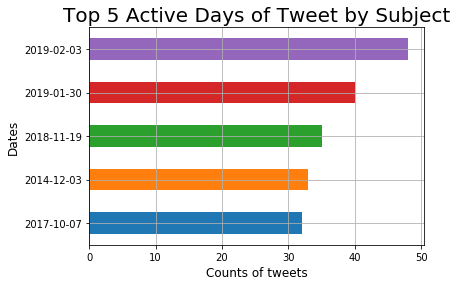

In [10]:
df['date'].value_counts().head().sort_values(ascending = True).plot(kind = 'barh', grid = True)
plt.title('Top 5 Active Days of Tweet by Subject', fontsize = 20)
plt.xlabel('Counts of tweets', fontsize = 12)
plt.ylabel('Dates', fontsize = 12)
plt.show()

## Number of Tweets and Number of retweets

In [11]:
def tag(str):
    if str.startswith('RT'):
        return 'Retweet'
    else:
        return 'Tweet'

df['tags'] = df['text'].apply(tag)
df['tags'].value_counts()

Tweet      2684
Retweet     545
Name: tags, dtype: int64

Text(0, 0.5, '')

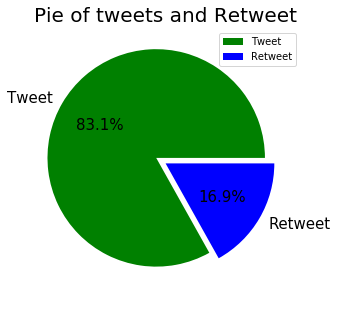

In [12]:
df['tags'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize = (5,5), legend = True, fontsize = 15, explode = (0.1,0), colors = ['green','blue'])
plt.title('Pie of tweets and Retweet', fontsize = 20)
plt.ylabel('')

## Which 5 people did they retweet their posts the most and how many each

In [13]:
retweets = df[df['tags'] == 'Retweet']
retweets.head()

,created_at,text,in_reply_to_status_id_str,source,in_reply_to_screen_name,contributors,quoted_status_id,quote_count,reply_count,retweet_count,favorite_count,retweeted,followers_count,date,tags
20,2019-11-30 15:52:14,RT @AUNigeria: HAPPENING NOW: AUN Founder's Da...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,63,0,NaN,NaN,2019-11-30,Retweet
36,2019-10-29 13:00:52,"RT @omonlakiki: Twenty years ago, Women Traffi...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,61,0,NaN,NaN,2019-10-29,Retweet
40,2019-10-24 10:21:17,"RT @omonlakiki: Emmanuel Kwache, veteran journ...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,28,0,NaN,NaN,2019-10-24,Retweet
170,2019-07-04 14:22:09,RT @PeterObi: It was reassuring that notwithst...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,2129,0,NaN,NaN,2019-07-04,Retweet
216,2019-05-19 20:14:49,RT @omonlakiki: No businessman (living or dead...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,291,0,NaN,NaN,2019-05-19,Retweet


In [14]:
person = []
for text in retweets['text']:
    name = text.split()[1][1:-1]
    person.append(name)
retweets['person'] = person
retweets.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,created_at,text,in_reply_to_status_id_str,source,in_reply_to_screen_name,contributors,quoted_status_id,quote_count,reply_count,retweet_count,favorite_count,retweeted,followers_count,date,tags,person
20,2019-11-30 15:52:14,RT @AUNigeria: HAPPENING NOW: AUN Founder's Da...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,63,0,NaN,NaN,2019-11-30,Retweet,AUNigeria
36,2019-10-29 13:00:52,"RT @omonlakiki: Twenty years ago, Women Traffi...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,61,0,NaN,NaN,2019-10-29,Retweet,omonlakiki
40,2019-10-24 10:21:17,"RT @omonlakiki: Emmanuel Kwache, veteran journ...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,28,0,NaN,NaN,2019-10-24,Retweet,omonlakiki
170,2019-07-04 14:22:09,RT @PeterObi: It was reassuring that notwithst...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,2129,0,NaN,NaN,2019-07-04,Retweet,PeterObi
216,2019-05-19 20:14:49,RT @omonlakiki: No businessman (living or dead...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,291,0,NaN,NaN,2019-05-19,Retweet,omonlakiki


In [15]:
retweets.groupby('person')['person'].count().sort_values(ascending = False).head()

person
AtikuOrg          117
omonlakiki         31
AUNigeria          25
SpokesManAtiku     24
Mustyblax          14
Name: person, dtype: int64

Text(0, 0.5, 'Counts of retweets')

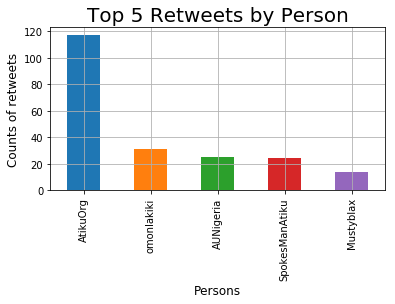

In [16]:
retweets.groupby('person')['person'].count().sort_values(ascending = False).head(5).plot(kind = 'bar', figsize = (6,3), grid = True)
plt.title('Top 5 Retweets by Person', fontsize = 20)
plt.xlabel('Persons', fontsize = 12)
plt.ylabel('Counts of retweets', fontsize = 12)

## What top 5 hours of the day do they tweet.

In [17]:
Hour = []
for date in df['created_at']:
    time = date.time()
    hr = time.hour
    Hour.append(hr)
df['hour'] = Hour
tweets_per_hr = df['hour'].value_counts().sort_values(ascending = False)
tweets_per_hr

7     252
19    243
8     237
17    235
11    235
18    226
15    223
16    221
9     219
12    197
14    193
13    192
10    190
20    130
6      83
21     76
22     40
23     31
5       5
0       1
Name: hour, dtype: int64

Text(0, 0.5, 'Hour of the day')

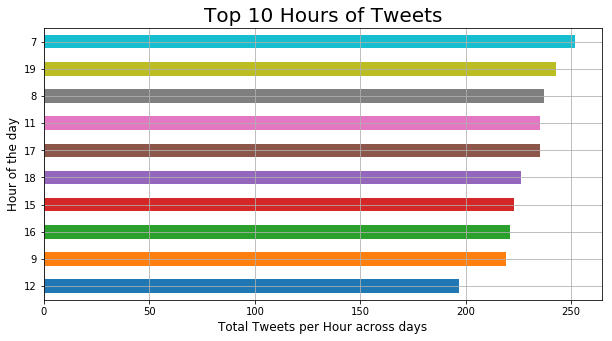

In [18]:
tweets_per_hr.head(10).sort_values(ascending = True).plot(kind = 'barh',figsize = (10,5), grid = True)
plt.title('Top 10 Hours of Tweets', fontsize = 20)
plt.xlabel('Total Tweets per Hour across days', fontsize = 12)
plt.ylabel('Hour of the day', fontsize = 12)

## What kind of device do they use to tweet

In [19]:
df['source'].value_counts()

Twitter for iPhone      3097
Twitter Web App           62
Twitter Web Client        61
Medium                     4
Periscope                  3
Facebook                   1
Twitter Media Studio       1
Name: source, dtype: int64

Text(0, 0.5, '')

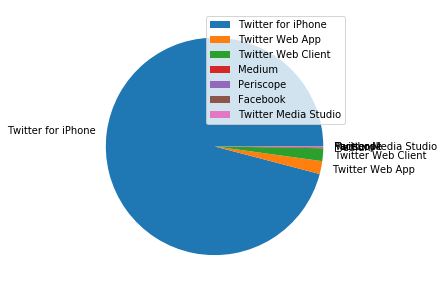

In [20]:
df['source'].value_counts().plot(kind = 'pie', figsize = (5,5), legend = True)
plt.ylabel('')

## On average, how many times do they tweet a day.

In [21]:
unique_day = set()
for day in df['date']:
    unique_day.add(day)
avg_tweet_per_day = df['date'].value_counts().mean()
print('The Average number of tweets per day is {}'.format(avg_tweet_per_day))

The Average number of tweets per day is 3.107795957651588


## What day did they tweet the most and how many tweets.

In [22]:
day_of_highest_tweets = df['date'].value_counts().max()
day_of_highest_tweets

48

In [23]:
daily_tweets = {}
for day in df['date']:
    if day in daily_tweets:
        daily_tweets[day] += 1
    else:
        daily_tweets[day] = 1
day_of_most_tweets = max(daily_tweets,key = daily_tweets.get)
print('The day with the most tweet is {} with {} nuumbers of tweets'.format(day_of_most_tweets, daily_tweets[day_of_most_tweets]))

The day with the most tweet is 2019-02-03 with 48 nuumbers of tweets


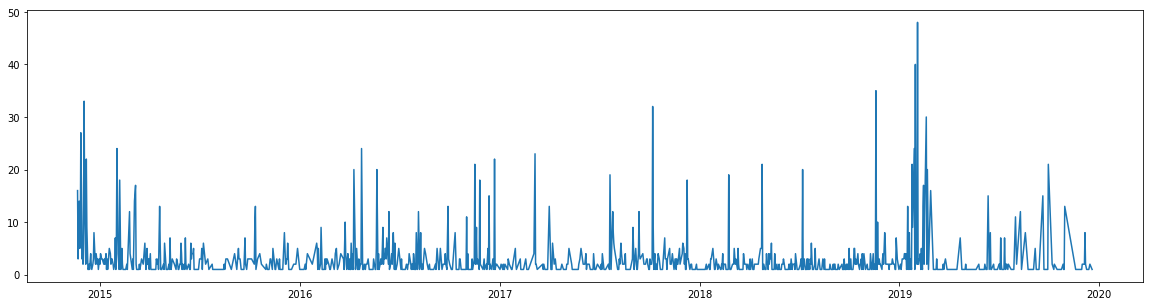

In [24]:
df['date'].value_counts().sort_index().plot(kind ='line',figsize = (20,5))

## What month did they tweet the most and how many tweets.

In [25]:
monthly_tweets = {}
for day in df['date']:
    month = day.month
    if month in monthly_tweets:
        monthly_tweets[month] += 1
    else:
        monthly_tweets[month] = 1
month_of_most_tweets = max(monthly_tweets,key = monthly_tweets.get)
print('The Month with the most tweet is {} with {} nuumbers of tweets'.format(month_of_most_tweets, monthly_tweets[month_of_most_tweets]))

The Month with the most tweet is 12 with 390 nuumbers of tweets


In [26]:
month = []
for date in df['date']:
    month.append(date.month)
df['month'] = month

In [27]:
df['month'].value_counts()

12    390
2     379
11    368
1     292
10    244
7     242
4     237
3     235
6     234
9     226
5     204
8     178
Name: month, dtype: int64

Text(0.5, 0, 'Tweets per month')

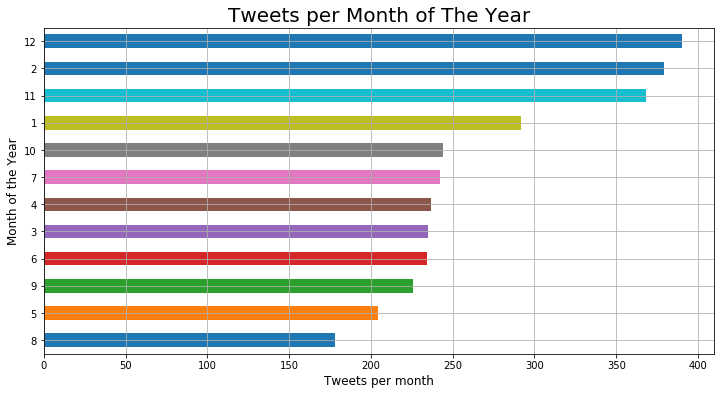

In [28]:
df['month'].value_counts().sort_values(ascending = True).plot(kind = 'barh', figsize = (12,6), grid = True)
plt.title('Tweets per Month of The Year', fontsize = 20)
plt.ylabel('Month of the Year', fontsize = 12)
plt.xlabel('Tweets per month', fontsize = 12)

## What are their top 15 words

In [29]:
word_count = {}
for text in df['text']:
    words = text.split()
    for word in words:
        if word.startswith('@'):
            pass
        elif word.startswith('#'):
            pass
        else:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1


In [30]:
word_count_list = []
for k,v in word_count.items():
    word_count_list.append([k,v])
words_count = pd.DataFrame(word_count_list)

In [31]:
words_count.columns = ['words', 'count']
words_count = words_count.sort_values(by = 'count',ascending = False)

In [32]:
top_15_used_words = words_count[words_count['words'] != 'RT'].head(15)
top_15_used_words

,words,count
46,the,3281
24,to,2483
2,of,2246
21,and,1874
18,in,1354
5,I,1194
7,a,1156
127,is,1055
42,for,940
171,our,839


## What are the top 10 hashtags they used. 

In [33]:
hashtags = df[df['text'].str.startswith('#')]
hashtags

,created_at,text,in_reply_to_status_id_str,source,in_reply_to_screen_name,contributors,quoted_status_id,quote_count,reply_count,retweet_count,favorite_count,retweeted,followers_count,date,tags,hour,month
4,2019-12-10 09:44:44,#HumanRightsDay means that the global human co...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,822,3380,NaN,NaN,2019-12-10,Tweet,9,12
561,2019-01-21 21:21:43,#PDPJigawaRally #LetsGetNigeriaWorkingAgain #B...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,933,2811,NaN,NaN,2019-01-21,Tweet,21,1
736,2018-11-19 05:59:44,#TheAtikuPlan will be unveiled today. Are you ...,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,3754,13141,NaN,NaN,2018-11-19,Tweet,5,11
1154,2018-02-23 21:53:33,#Keynote\n\nOur nation is going through a lot ...,9.671553e+17,Twitter for iPhone,atiku,NaN,Not Availabe,Not Availabe,Not Availabe,115,150,NaN,NaN,2018-02-23,Tweet,21,2
1251,2017-12-07 17:23:50,#Smile You know I can’t do anything about the ...,NaN,Twitter for iPhone,NaN,NaN,938820364033019905,Not Availabe,Not Availabe,461,1017,NaN,NaN,2017-12-07,Tweet,17,12
1315,2017-11-03 08:51:43,#FakeNews https://t.co/N202Qt3kmq,NaN,Twitter for iPhone,NaN,NaN,926188099327033350,Not Availabe,Not Availabe,281,281,NaN,NaN,2017-11-03,Tweet,8,11
1464,2017-09-03 14:19:55,"#EidMubarak from the Waziri Adamawa, Turaki Ad...",NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,232,792,NaN,NaN,2017-09-03,Tweet,14,9
1466,2017-09-01 16:33:15,#AtikuSeesTheFuture #smile https://t.co/cpTUL6...,NaN,Twitter for iPhone,NaN,NaN,903656095838859264,Not Availabe,Not Availabe,116,242,NaN,NaN,2017-09-01,Tweet,16,9
1502,2017-08-07 16:23:41,"#smile Whether I'm in politics or not, we stil...",NaN,Twitter for iPhone,NaN,NaN,894589124149227523,Not Availabe,Not Availabe,209,338,NaN,NaN,2017-08-07,Tweet,16,8
1602,2017-05-27 08:14:26,#Ramadan Kareem.,NaN,Twitter for iPhone,NaN,NaN,Not Availabe,Not Availabe,Not Availabe,195,426,NaN,NaN,2017-05-27,Tweet,8,5


In [34]:
hashtag_count = {}
for text in hashtags['text']:
    char = text.split()
    for c in char:
        if c.startswith('#'):
            if c in hashtag_count:
                hashtag_count[c] += 1
            else:
                hashtag_count[c] = 1
hashtag_count

{'#HumanRightsDay': 1,
 '#PDPJigawaRally': 1,
 '#LetsGetNigeriaWorkingAgain': 1,
 '#BetterNigeria': 1,
 '#TheAtikuPlan': 1,
 '#Keynote': 1,
 '#Smile': 9,
 '#FakeNews': 1,
 '#EidMubarak': 4,
 '#AtikuSeesTheFuture': 1,
 '#smile': 10,
 '#Ramadan': 1,
 '#Aprilfools': 1,
 '#70': 1,
 '#June12': 1,
 '#LassaFever': 1,
 '#SupportChildrenWithSpecialNeeds': 1,
 '#DayOfTheGirl': 1,
 '#iAmReady': 1,
 '#ANigeriaForAll,': 1,
 '#KanoBombBlast:': 1}

In [35]:
hashtag_count_list = []
for k,v in hashtag_count.items():
    hashtag_count_list.append([k,v])
hashtag_count_list
hashtags_df = pd.DataFrame(hashtag_count_list)

In [36]:
hashtags_df.columns = ['hashtag','cnt']
top_10_hashtags = hashtags_df.sort_values(by = 'cnt', ascending = False).head(10)

In [37]:
top_10_hashtags

,hashtag,cnt
10,#smile,10
6,#Smile,9
8,#EidMubarak,4
12,#Aprilfools,1
19,"#ANigeriaForAll,",1
18,#iAmReady,1
17,#DayOfTheGirl,1
16,#SupportChildrenWithSpecialNeeds,1
15,#LassaFever,1
14,#June12,1
